In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Mounted at /content/drive


In [2]:
# extract data from zip file
import zipfile
import os

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/drive/MyDrive/465 Project/new_archive.zip'
extract_folder_path = '/content/data'

os.makedirs(extract_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [3]:
# lib imports
import torch
import os
import numpy as np
import pandas as pd
import random
import cv2

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
IMG_COUNT = 480

In [5]:
# set this between [1, 10] for differently composed datasets
# reference: https://arxiv.org/pdf/2307.05911.pdf
TRAINING_SET = 1

# 10 Different training sets as mentioned in original paper

In [6]:
#@title This cell is for composing the datasets as mentioned in the original paper

# Set the target image size
target_size = (IMG_WIDTH, IMG_HEIGHT)

# Create empty lists to hold the images and masks
images = []
masks = []

image_dir_ms = '/content/data/GRAIN DATA SET/RG'
mask_dir_ms = '/content/data/GRAIN DATA SET/RGMask'
# vt stands for voronoi tessellation
image_dir_vt = '/content/data/GRAIN DATA SET/AG'
mask_dir_vt = '/content/data/GRAIN DATA SET/AGMask'

image_dir_hed = '/content/data/GRAIN DATA SET/HED_PRE'
mask_dir_hed = '/content/data/GRAIN DATA SET/RGMask'

image_dir_grad = '/content/data/GRAIN DATA SET/GRAD_PRE'
mask_dir_grad = '/content/data/GRAIN DATA SET/RGMask'

image_dir_thresh = '/content/data/GRAIN DATA SET/THRESH_PRE'
mask_dir_thresh = '/content/data/GRAIN DATA SET/RGMask'

if TRAINING_SET==1:
    # 100% Manually Segmented
    print("Selected Training Set 1")
    print("Manually Segmented - 100% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==2:
    # 25% Artificial, 75% Manually Segmented (160, 480)
    print("Selected Training Set 2")
    print("Voronoi Tessellation - 25% (160)")
    print("Manually Segmented - 75% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==160:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==160:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==3:
    # 50% Artificial, 50% Manually Segmented (480, 480)
    print("Selected Training Set 3")
    print("Voronoi Tessellation - 50% (480)")
    print("Manually Segmented - 50% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==4:
    # 75% Artificial, 25% Manually Segmented (800, 266)
    print("Selected Training Set 4")
    print("Voronoi Tessellation - 75% (800)")
    print("Manually Segmented - 25% (266)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==266:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==266:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==5:
    # 100% Artificial (800)
    print("Selected Training Set 5")
    print("Voronoi Tessellation - 100% (800)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==6:
    # 50% HED Preprocessed, 50% Manually Segmented (240, 240)
    print("Selected Training Set 6")
    print("HED Preprocessed - 50% (240)")
    print("Manually Segmented - 50% (240)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==7:
    # 50% Manually Segmented, 25% Artificial, 25% HED Preprocessed(240, 120, 120)
    print("Selected Training Set 7")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("HED Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


elif TRAINING_SET==8:
    # 50% Manually Segmented, 25% Artificial, 25% GRAD Preprocessed(240, 120, 120)
    print("Selected Training Set 8")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("GRAD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==9:
    # 50% Manually Segmented, 25% Artificial, 25% THRESHOLD Preprocessed(240, 120, 120)
    print("Selected Training Set 9")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("THRESHOLD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==10:
    # 50% Manually Segmented, 16.67% HED Prep., 16.67% GRAD Prep.,16.67% THRESHOLD Prep.(240, 80, 80, 80)
    print("Selected Training Set 10")
    print("Manually Segmented - 50% (240)")
    print("HED Preprocessed - 16.67% (80)")
    print("GRAD Preprocessed - 16.67% (80)")
    print("THRESHOLD Preprocessed - 16.67% (80)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1



IMG_COUNT = len(images)
print(f"image count : {IMG_COUNT}")

Selected Training Set 1
Manually Segmented - 100% (480)
image count : 480


In [7]:
# # Set the directories containing the images and masks
# image_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AG'
# mask_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AGMask'

# # Set the target image size
# target_size = (IMG_WIDTH, IMG_HEIGHT)

# # Create empty lists to hold the images and masks
# images = []
# masks = []

# # Iterate through the directories and load the images and masks
# for file in sorted(os.listdir(image_dir)):
#     # Load the image and resize to the target size
#     img = cv2.imread(os.path.join(image_dir, file))
#     img = cv2.resize(img, target_size)

#     # Append the resized image to the list of images
#     images.append(img)

# for file in sorted(os.listdir(mask_dir)):

#     # Load the corresponding mask and resize to the target size
#     #mask_file = file.replace('.jpg', '.png')
#     mask = cv2.imread(os.path.join(mask_dir, file))
#     mask = cv2.resize(mask, target_size)

#     # Append the resized mask to the list of masks
#     masks.append(mask)

# IMG_COUNT = len(images)

# Example Image and it's Ground Truth

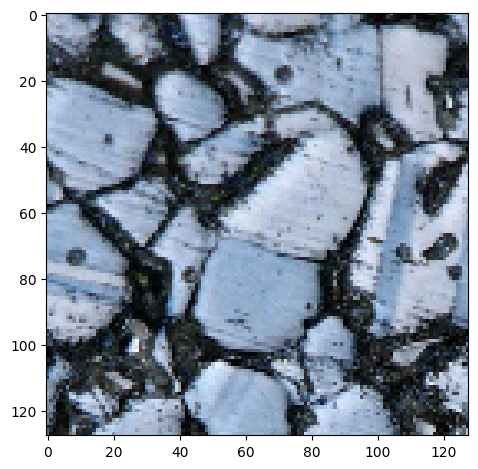

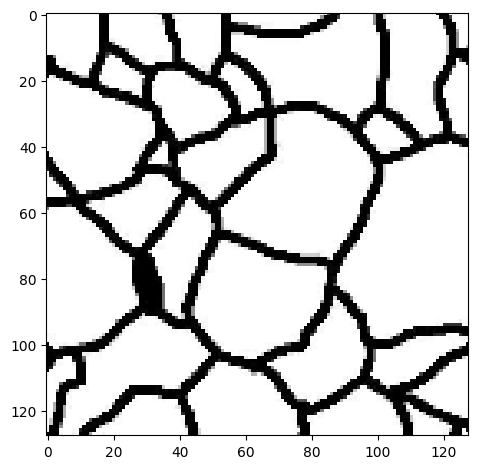

In [8]:
# example
image_x = random.randint(0, IMG_COUNT)
image_x
imshow(images[image_x])
plt.show()
imshow(masks[image_x])
plt.show()

# SMP DeeplabV3

### Installations:

In [9]:
pip install -U segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

In [10]:
pip install -U git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-h9uefvrh
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-h9uefvrh
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit b081758e5e6cd1125e97b31e1fb3819aa1575e47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 0.9.2
    Uninstalling timm-0.9.2:
      Successfully uninstalled timm-0.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.3.3 requires timm==0.9.2, but you have timm 0.9.7 which is incompatible.


## Model

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
import torch
import segmentation_models_pytorch as smp

# Encoders that are generally good with atrous convolution needed for DeepLabV3Plus
encoders = ["resnet152", "efficientnet-b7", "timm-regnety_320"]

def initialize_models(num_models, device):
    models = []
    for i in range(num_models):
        encoder = encoders[i % len(encoders)]
        try:
            model = smp.DeepLabV3Plus(
                encoder_name=encoder,
                encoder_weights="imagenet",
                encoder_output_stride=16,
                decoder_channels=256,
                decoder_atrous_rates=(12, 24, 36),
                in_channels=3,
                classes=1,
                activation='sigmoid',
                upsampling=4
            )
            models.append(model.to(device))
        except ValueError as e:
            print(f"Skipping {encoder} due to incompatibility with DeepLabV3Plus: {e}")
    return models

num_models = 3  # Number of models in the ensemble
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models = initialize_models(num_models, device)


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:02<00:00, 82.7MB/s]
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:01<00:00, 190MB/s]
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnety_320-ba464b29.pth" to /root/.cache/torch/hub/checkpoints/regnety_320-ba464b29.pth
100%|██████████| 554M/554M [00:34<00:00, 17.0MB/s]


In [13]:
import torch

# Create a dummy input tensor of size (1, 3, 128, 128)
dummy_input = torch.randn(1, 3, 128, 128).to(device)  # Random values simulating an image input

# Iterate over each model in the ensemble
for i, model in enumerate(models):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for this forward pass
        dummy_output = model(dummy_input)  # Forward pass through the model

    # Print output details for each model
    print(f"Model {i+1} output shape:", dummy_output.shape)
    print(f"Model {i+1} output values:", dummy_output)


Model 1 output shape: torch.Size([1, 1, 128, 128])
Model 1 output values: tensor([[[[0.4964, 0.4964, 0.4965,  ..., 0.4966, 0.4962, 0.4958],
          [0.4963, 0.4963, 0.4963,  ..., 0.4965, 0.4961, 0.4956],
          [0.4961, 0.4962, 0.4962,  ..., 0.4964, 0.4959, 0.4955],
          ...,
          [0.4962, 0.4960, 0.4958,  ..., 0.4958, 0.4957, 0.4957],
          [0.4960, 0.4958, 0.4955,  ..., 0.4956, 0.4956, 0.4955],
          [0.4959, 0.4955, 0.4952,  ..., 0.4954, 0.4954, 0.4954]]]],
       device='cuda:0')
Model 2 output shape: torch.Size([1, 1, 128, 128])
Model 2 output values: tensor([[[[0.5483, 0.5598, 0.5712,  ..., 0.5882, 0.5854, 0.5825],
          [0.5405, 0.5533, 0.5660,  ..., 0.5810, 0.5766, 0.5721],
          [0.5328, 0.5468, 0.5608,  ..., 0.5737, 0.5677, 0.5616],
          ...,
          [0.4944, 0.5078, 0.5212,  ..., 0.5331, 0.5304, 0.5276],
          [0.4989, 0.5129, 0.5268,  ..., 0.5290, 0.5295, 0.5300],
          [0.5034, 0.5179, 0.5324,  ..., 0.5249, 0.5287, 0.5324]]]],


# dataset splitting

In [14]:
# create the X and Y (input and output)

X_train = np.array(images)
Y_train = np.array(masks)
print(X_train.shape, Y_train.shape)
# change the Y to a boolean
Y_train = np.where(Y_train > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [15]:
# careful to run this cell only once (otherwise shape changes)
X_train = np.transpose(X_train, (0, 3, 1 , 2))
Y_train = np.transpose(Y_train, (0, 3, 1 , 2))
print(X_train.shape, Y_train.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [16]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_train, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(IMG_COUNT, 1, IMG_HEIGHT, IMG_WIDTH)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


In [17]:
# prompt: Make Dataset from data

from torch.utils.data import Dataset

class GrainDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx]).float()
        mask = torch.from_numpy(self.masks[idx]).float()
        return image, mask

# Create the dataset
dataset = GrainDataset(X_train, Y_t)



In [18]:
# prompt: create train and validation dataset

from torch.utils.data import random_split

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
r = len(dataset) - train_size
val_size = int(0.5 * r)
test_size = int(0.5 * r)
train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])



In [19]:
print(f"Train : {train_size}")
print(f"Val: {val_size}")
print(f"Test: {test_size}")

Train : 384
Val: 48
Test: 48


In [20]:
# Define callbacks
class ModelCheckpoint:
    def __init__(self, checkpoint_path):
        self.checkpoint_path = checkpoint_path
        self.best_loss = float('inf')

    def __call__(self, model, epoch, train_loss, val_loss):
        if val_loss < self.best_loss:
            torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'train_loss' : train_loss,
            'val_loss': val_loss,
            }, self.checkpoint_path)
            print("Checkpoint saved")
            self.best_loss = val_loss

from datetime import datetime
checkpoint_path = f'/content/drive/MyDrive/465 Project/Unet++ Checkpoints/TrainingSet{TRAINING_SET}_{datetime.now().strftime("%d%m%Y %H:%M:%S")}.pt'
# print(checkpoint_path)
# os.makedirs("/content/drive/MyDrive/465 Project", exist_ok=True) # already exists
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpointer = ModelCheckpoint(checkpoint_path)


In [21]:
print(f"current: {checkpoint_path}")

current: /content/drive/MyDrive/465 Project/Unet++ Checkpoints/TrainingSet1_27042024 18:55:07.pt


In [22]:
from torch.utils.data import DataLoader

# Define DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Dice Loss func

In [23]:
import torch
import torch.nn.functional as F

def continuous_dice_loss(output, target):
    """
    Calculates the Continuous Dice Loss for a set of prediction and target.

    Args:
    output (torch.Tensor): Model's probabilistic map output, values between [0, 1].
    target (torch.Tensor): Ground truth binary tensor, values {0, 1}.

    Returns:
    torch.Tensor: Continuous Dice Loss.
    """
    # Flatten the tensors to calculate the loss on a per-image basis
    output_flat = output.view(output.size(0), -1)
    target_flat = target.view(target.size(0), -1)

    # Calculate intersection and cardinality (or area)
    intersection = torch.sum(output_flat * target_flat, dim=1)
    cardinality_output = torch.sum(output_flat, dim=1)
    cardinality_target = torch.sum(target_flat, dim=1)

    # Calculate c as per the definition
    c_numerator = torch.sum(output_flat * target_flat, dim=1)
    c_denominator = torch.sum(output_flat * torch.sign(target_flat), dim=1)

    # Avoid division by zero
    c_denominator = torch.where(c_denominator == 0, torch.ones_like(c_denominator), c_denominator)
    c = c_numerator / c_denominator

    # Compute continuous Dice coefficient
    cDC = (2. * intersection) / (c * cardinality_target + cardinality_output)

    # Compute loss as 1 - cDC
    cDL = 1 - cDC

    return cDL.mean()

##  Better to use dice_weight > ce_weight
def combined_dice_ce_loss(output, target, dice_weight=0.5, ce_weight=0.5):
    ce_loss = F.binary_cross_entropy(output, target)
    dice_loss = continuous_dice_loss(output, target)
    combined_loss = dice_weight * dice_loss + ce_weight * ce_loss
    return combined_loss


EPSILON = 1e-6

class DiceLoss(torch.nn.Module):
    def __init__(self,):
        super().__init__()

    def forward(self, pred, mask):
        pred = pred.flatten()
        mask = mask.flatten()

        intersect = (mask * pred).sum()
        dice_score = 2*intersect / (pred.sum() + mask.sum() + EPSILON)
        dice_loss = 1 - dice_score
        return dice_loss

#Training Loop

In [24]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn


def train_ensemble(models, num_epochs, train_loader, val_loader, device):
    optimizers = [optim.Adam(model.parameters(), lr=0.0002) for model in models]
    criterion = combined_dice_ce_loss

    for epoch in range(num_epochs):
        for model, optimizer in zip(models, optimizers):
            model.train()
            train_loss = 0.0
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets, 0.8, 0.2)
                loss.backward()
                optimizer.step()
                train_loss += loss.item() * inputs.size(0)
            train_loss /= len(train_loader.dataset)

            # Validation step
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, targets, 0.8, 0.2)
                    val_loss += loss.item() * inputs.size(0)
            val_loss /= len(val_loader.dataset)
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return models  # Return the trained models

# Example usage:
num_epochs = 15
trained_models = train_ensemble(models, num_epochs, train_loader, val_loader, device)


Epoch [1/15], Train Loss: 0.3558, Val Loss: 0.4691
Epoch [1/15], Train Loss: 0.3392, Val Loss: 0.3698
Epoch [1/15], Train Loss: 0.3594, Val Loss: 0.4358
Epoch [2/15], Train Loss: 0.2486, Val Loss: 0.2995
Epoch [2/15], Train Loss: 0.2580, Val Loss: 0.4323
Epoch [2/15], Train Loss: 0.2553, Val Loss: 0.2830
Epoch [3/15], Train Loss: 0.2149, Val Loss: 0.2191
Epoch [3/15], Train Loss: 0.2206, Val Loss: 0.3096
Epoch [3/15], Train Loss: 0.2172, Val Loss: 0.2412
Epoch [4/15], Train Loss: 0.2017, Val Loss: 0.2357
Epoch [4/15], Train Loss: 0.2022, Val Loss: 0.2319
Epoch [4/15], Train Loss: 0.2017, Val Loss: 0.2190
Epoch [5/15], Train Loss: 0.1938, Val Loss: 0.1966
Epoch [5/15], Train Loss: 0.1920, Val Loss: 0.2032
Epoch [5/15], Train Loss: 0.1931, Val Loss: 0.1972
Epoch [6/15], Train Loss: 0.1877, Val Loss: 0.2673
Epoch [6/15], Train Loss: 0.1851, Val Loss: 0.1916
Epoch [6/15], Train Loss: 0.1876, Val Loss: 0.1889
Epoch [7/15], Train Loss: 0.1835, Val Loss: 0.3276
Epoch [7/15], Train Loss: 0.180

In [ ]:
# checkpointer(model,epoch, train_loss, val_loss)

Checkpoint saved


In [ ]:
# current_checkpoint = torch.load(checkpoint_path)
# model.load_state_dict(current_checkpoint['model_state_dict'])
# model.eval()
# print(current_checkpoint['train_loss'],current_checkpoint['val_loss'])

0.03722295646245281 0.10303842276334763


In [25]:
def display_results(image, ground_truth_mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display input image
    axes[0].imshow(np.transpose(image, (1, 2, 0)))
    axes[0].set_title('Input Image')

    # Display ground truth mask
    axes[1].imshow(np.squeeze(ground_truth_mask))
    axes[1].set_title('Ground Truth Mask')

    # Display predicted mask
    axes[2].imshow(np.squeeze(predicted_mask))
    axes[2].set_title('Predicted Mask')

    plt.show()

# Results

In [26]:
# dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(test_dataset,batch_size=16, shuffle=False)

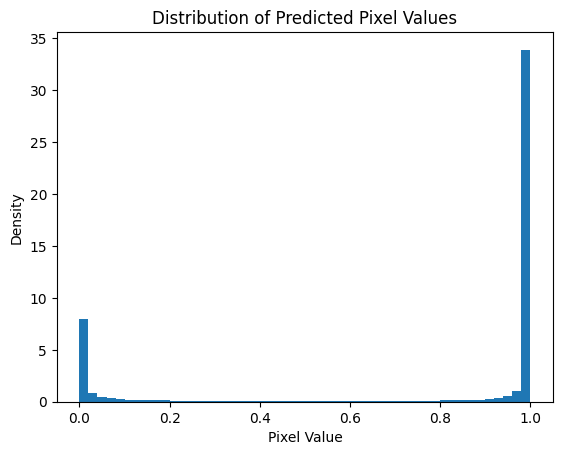

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


model.eval()

all_preds = []

with torch.no_grad():
    for images, _ in val_loader:
        images = images.to(device)
        preds = model(images)
        all_preds.extend(preds.flatten().cpu().numpy())  # Flatten and move to CPU

all_preds_np = np.array(all_preds)

# Plot the histogram
plt.hist(all_preds_np, bins=50, density=True)
plt.title('Distribution of Predicted Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.show()


#### torch metrics Dice Score

In [27]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.7 MB/s eta 0:00:00


##### Dice & IoU

In [28]:
from torchmetrics.functional import dice
from torchmetrics.functional import jaccard_index

def ensemble_voting(models, loader, device, threshold=0.5):
    total_votes = []  # Use a list to store votes from each batch

    # Ensure all models are in evaluation mode
    for model in models:
        model.eval()

    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            batch_votes = None

            for model in models:
                outputs = torch.sigmoid(model(images))  # Convert logits to probabilities
                votes = (outputs > threshold).int()  # Apply threshold and convert to integer

                if batch_votes is None:
                    batch_votes = votes
                else:
                    batch_votes += votes

            majority_votes = batch_votes > (len(models) / 2)  # Majority vote
            total_votes.append(majority_votes.float())  # Store batch votes as float tensors

    return total_votes  # Return a list of tensors, one for each batch

def evaluate_ensemble_by_voting(models, loader, device, threshold=0.5):
    total_dice = 0.0
    total_jaccard = 0.0
    total_samples = 0

    majority_votes = ensemble_voting(models, loader, device, threshold)  # Get majority votes per batch

    with torch.no_grad():
        for (images, targets), votes in zip(loader, majority_votes):
            images, targets = images.to(device), targets.to(device)

            # Ensure tensors are the right shape
            for i in range(votes.size(0)):  # votes.size(0) gives the batch size for current batch
                pred = votes[i].unsqueeze(0)
                target = targets[i].unsqueeze(0).int()

                dice_score = dice(pred, target)
                jaccard_score = jaccard_index(pred, target, task='binary')

                total_dice += dice_score.item()
                total_jaccard += jaccard_score.item()
                total_samples += 1

    average_dice = total_dice / total_samples
    average_jaccard = total_jaccard / total_samples

    return average_dice, average_jaccard

device = "cuda" if torch.cuda.is_available() else "cpu"

# dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(test_dataset,batch_size=16, shuffle=False)

average_dice, average_jaccard = evaluate_ensemble_by_voting(models, rg_val_loader, device)
print(f"Average Dice Score: {average_dice:.4f}")
print(f"Average Jaccard Index: {average_jaccard:.4f}")


Average Dice Score: 0.8669
Average Jaccard Index: 0.7654


In [29]:
# dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(test_dataset,batch_size=16, shuffle=False)

from torchmetrics.functional import dice
from torchmetrics.functional import jaccard_index
cnt = -1;
for model in models:
  total_jaccard_score = 0.0
  total_dice_score = 0.0
  total_num_samples = 0
  cnt += 1
  for images, masks in rg_val_loader:
      batch_size = images.size(0)  # Get the actual batch size
      total_num_samples += batch_size

      with torch.no_grad():
          images = images.to(device)
          masks = masks.to(device)

          # Forward pass
          preds = model(images)

          for ind in range(len(preds)):
              pred_tensor = (preds[ind] > 0.5).float()
              gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

              dice_score = dice(pred_tensor, gt_tensor)
              total_dice_score += dice_score.item()

              jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
              total_jaccard_score += jaccard_score.item()

  average_dice_score = total_dice_score / total_num_samples
  average_jaccard_score = total_jaccard_score / total_num_samples

  print(f"Encoder -> {cnt+1} : ", encoders[cnt])
  print(f"Training set: {TRAINING_SET}")
  print(f"Total Number samples: {total_num_samples}")
  print(f"Average Dice Score: {average_dice_score}")
  print(f"Average Jaccard Index: {average_jaccard_score}")

Encoder -> 1 :  resnet152
Training set: 1
Total Number samples: 48
Average Dice Score: 0.8966675028204918
Average Jaccard Index: 0.8130717501044273
Encoder -> 2 :  efficientnet-b7
Training set: 1
Total Number samples: 48
Average Dice Score: 0.8968770665427049
Average Jaccard Index: 0.8134108558297157
Encoder -> 3 :  timm-regnety_320
Training set: 1
Total Number samples: 48
Average Dice Score: 0.8965398619572321
Average Jaccard Index: 0.8128973630567392
